**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)

import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

from sklearn.feature_extraction import DictVectorizer
sns.set_context('talk')

In [2]:
# Acá deberían leer el conjunto de datos que ya tienen.
df=pd.read_csv('melbourne_houses_final_df.csv')

df.head(2)

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,date_month,date_year,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
0,2,h,1480000.0,S,2016-12-03,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019.0,Biggin,Abbotsford,12,2016,3067.0,130.624031,258.0,0.244003,46.0,0.197535,31.0
1,2,h,1035000.0,S,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0,Biggin,Abbotsford,2,2016,3067.0,130.624031,258.0,0.244003,46.0,0.197535,31.0


In [3]:
df.shape

(12357, 27)

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [4]:
# Es importante no tener nulos para OneHotEncoder
df.isnull().sum()

Rooms                            0
Type                             0
Price                            0
Method                           0
Date                             0
Distance                         0
Postcode                         0
Bathroom                         0
Car                             58
Landsize                         0
BuildingArea                  5884
YearBuilt                     4892
Lattitude                        0
Longtitude                       0
Regionname                       0
Propertycount                    0
SellerG                          0
Suburb                           0
date_month                       0
date_year                        0
zipcode                          0
airbnb_price_mean                0
airbnb_record_count              0
airbnb_weekly_price_mean         0
airbnb_weekly_price_count        0
airbnb_monthly_price_mean        0
airbnb_monthly_price_count       0
dtype: int64

In [5]:
df.shape

(12357, 27)

Seguimos teniendo valores nulos en la variable `Car` (58). Como estos valores representan sólo el 0.47 % del total de los datos, se decidió quitarlos directamente.

In [6]:
df.dropna(subset=['Car'],inplace=True)
df.isnull().sum()

Rooms                            0
Type                             0
Price                            0
Method                           0
Date                             0
Distance                         0
Postcode                         0
Bathroom                         0
Car                              0
Landsize                         0
BuildingArea                  5852
YearBuilt                     4862
Lattitude                        0
Longtitude                       0
Regionname                       0
Propertycount                    0
SellerG                          0
Suburb                           0
date_month                       0
date_year                        0
zipcode                          0
airbnb_price_mean                0
airbnb_record_count              0
airbnb_weekly_price_mean         0
airbnb_weekly_price_count        0
airbnb_monthly_price_mean        0
airbnb_monthly_price_count       0
dtype: int64

In [7]:
"""
La columna fecha como tal no tiene sentido hacer OneHotEncoding, escalarla o imputarla. Mas bien nos serivía para hacer ingenería de
features.
En cuanto a latitud y longitud, habíamos establecido que nos serviría para la parte de visualización. Ya contamos con otras variables
referidas a la ubicación geográfica de las propiedades.

"""

df.drop(['Date','Lattitude','Longtitude'],inplace=True,axis=1)

#Este dataframe será utilizado en el punto dos
df_building_year=df[['BuildingArea','YearBuilt']]

#Quitamos las columnas 
df.drop(['BuildingArea','YearBuilt'],axis=1,inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12299 entries, 0 to 12356
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       12299 non-null  int64  
 1   Type                        12299 non-null  object 
 2   Price                       12299 non-null  float64
 3   Method                      12299 non-null  object 
 4   Distance                    12299 non-null  float64
 5   Postcode                    12299 non-null  float64
 6   Bathroom                    12299 non-null  float64
 7   Car                         12299 non-null  float64
 8   Landsize                    12299 non-null  float64
 9   Regionname                  12299 non-null  object 
 10  Propertycount               12299 non-null  float64
 11  SellerG                     12299 non-null  object 
 12  Suburb                      12299 non-null  object 
 13  date_month                  122

In [9]:
"""
Cambiamos el tipo de algunas variables de tipo int o float que en realidad son categóricas. Esto nos trae inconvenientes para 
OneHotEncoder, no con get_dummies de pandas.
"""

df.Rooms=df.Rooms.astype(str)
df.Car=df.Car.astype(str)
df.Method=df.Method.astype(str)
df.Postcode=df.Postcode.astype(str)
df.Bathroom=df.Bathroom.astype(str)
df.zipcode=df.zipcode.astype(str)
df.date_year=df.date_year.astype(str)
df.date_month=df.date_month.astype(str)
df.zipcode=df.zipcode.astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12299 entries, 0 to 12356
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       12299 non-null  object 
 1   Type                        12299 non-null  object 
 2   Price                       12299 non-null  float64
 3   Method                      12299 non-null  object 
 4   Distance                    12299 non-null  float64
 5   Postcode                    12299 non-null  object 
 6   Bathroom                    12299 non-null  object 
 7   Car                         12299 non-null  object 
 8   Landsize                    12299 non-null  float64
 9   Regionname                  12299 non-null  object 
 10  Propertycount               12299 non-null  float64
 11  SellerG                     12299 non-null  object 
 12  Suburb                      12299 non-null  object 
 13  date_month                  122

### Get_dummies

In [11]:
cols_cat=['Rooms','Type','Method','Postcode','Bathroom','Car','Regionname','SellerG','Suburb','zipcode'
         ,'date_year','date_month']

In [12]:
#Dataframe con variables numéricas

df_num=df.drop(cols_cat,axis=1).reset_index(drop=True)

df_num.head(2)

,Price,Distance,Landsize,Propertycount,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
0,1480000.0,2.5,202.0,4019.0,130.624031,258.0,0.244003,46.0,0.197535,31.0
1,1035000.0,2.5,156.0,4019.0,130.624031,258.0,0.244003,46.0,0.197535,31.0


In [13]:
"""
Si ponemos drop_first=False, sería lo mismo que OneHotEncoding. En cambio si ponemos True, nos quitará una columna.

"""

df_dummies = pd.get_dummies(df,columns=cols_cat, drop_first=False)  

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12299 entries, 0 to 12356
Columns: 904 entries, Price to date_month_9
dtypes: float64(10), uint8(894)
memory usage: 11.5 MB


### One Hot encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)

df_onehot=encoder.fit_transform(df[cols_cat])

df_onehot=pd.DataFrame(df_onehot,columns=encoder.get_feature_names())

df_onehot=pd.concat([df_onehot,df_num],axis=1)

df_onehot.shape

(12299, 904)

### DictVectorizer

In [15]:
#Convertimos en DataFrame en diccionario para poder utilizar DictVectorizer()

dict_df=list(df.T.to_dict().values())
dict_df[:2]

[{'Rooms': '2',
  'Type': 'h',
  'Price': 1480000.0,
  'Method': 'S',
  'Distance': 2.5,
  'Postcode': '3067.0',
  'Bathroom': '1.0',
  'Car': '1.0',
  'Landsize': 202.0,
  'Regionname': 'Northern Metropolitan',
  'Propertycount': 4019.0,
  'SellerG': 'Biggin',
  'Suburb': 'Abbotsford',
  'date_month': '12',
  'date_year': '2016',
  'zipcode': '3067.0',
  'airbnb_price_mean': 130.62403100775194,
  'airbnb_record_count': 258.0,
  'airbnb_weekly_price_mean': 0.2440025619256148,
  'airbnb_weekly_price_count': 46.0,
  'airbnb_monthly_price_mean': 0.197534571962923,
  'airbnb_monthly_price_count': 31.0},
 {'Rooms': '2',
  'Type': 'h',
  'Price': 1035000.0,
  'Method': 'S',
  'Distance': 2.5,
  'Postcode': '3067.0',
  'Bathroom': '1.0',
  'Car': '0.0',
  'Landsize': 156.0,
  'Regionname': 'Northern Metropolitan',
  'Propertycount': 4019.0,
  'SellerG': 'Biggin',
  'Suburb': 'Abbotsford',
  'date_month': '2',
  'date_year': '2016',
  'zipcode': '3067.0',
  'airbnb_price_mean': 130.62403100775

In [16]:
#Nos genera una matriz sparse

vec=DictVectorizer()
dict_df=vec.fit_transform(dict_df)
dict_df

<12299x904 sparse matrix of type '<class 'numpy.float64'>'
	with 270578 stored elements in Compressed Sparse Row format>

In [17]:
vec.get_feature_names()[:5]

['Bathroom=0.0',
 'Bathroom=1.0',
 'Bathroom=2.0',
 'Bathroom=3.0',
 'Bathroom=4.0']

In [18]:
 #La convertimos en matriz densa y luego en DataFrame.

dict_df=dict_df.todense()
df_dimvect=pd.DataFrame(dict_df,columns=vec.get_feature_names())



In [19]:
df_dimvect

,Bathroom=0.0,Bathroom=1.0,Bathroom=2.0,Bathroom=3.0,Bathroom=4.0,Bathroom=5.0,Bathroom=6.0,Bathroom=8.0,Car=0.0,Car=1.0,Car=10.0,Car=2.0,Car=3.0,Car=4.0,Car=5.0,Car=6.0,Car=7.0,Car=8.0,Car=9.0,Distance,Landsize,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,Postcode=3000.0,Postcode=3002.0,Postcode=3003.0,Postcode=3006.0,Postcode=3008.0,Postcode=3011.0,Postcode=3012.0,Postcode=3013.0,Postcode=3015.0,Postcode=3016.0,Postcode=3018.0,Postcode=3019.0,Postcode=3020.0,Postcode=3021.0,Postcode=3023.0,Postcode=3024.0,Postcode=3025.0,Postcode=3027.0,Postcode=3028.0,Postcode=3029.0,Postcode=3030.0,Postcode=3031.0,Postcode=3032.0,Postcode=3033.0,Postcode=3037.0,Postcode=3039.0,Postcode=3040.0,Postcode=3042.0,Postcode=3043.0,Postcode=3044.0,Postcode=3046.0,Postcode=3047.0,Postcode=3049.0,Postcode=3051.0,Postcode=3052.0,Postcode=3053.0,Postcode=3054.0,Postcode=3055.0,Postcode=3056.0,Postcode=3057.0,Postcode=3058.0,Postcode=3059.0,Postcode=3064.0,Postcode=3065.0,Postcode=3066.0,Postcode=3067.0,Postcode=3068.0,Postcode=3070.0,Postcode=3071.0,Postcode=3072.0,Postcode=3073.0,Postcode=3074.0,Postcode=3076.0,Postcode=3078.0,Postcode=3079.0,Postcode=3081.0,Postcode=3082.0,Postcode=3083.0,Postcode=3084.0,Postcode=3088.0,Postcode=3095.0,Postcode=3101.0,Postcode=3102.0,Postcode=3103.0,Postcode=3104.0,Postcode=3105.0,Postcode=3106.0,Postcode=3107.0,Postcode=3108.0,Postcode=3109.0,Postcode=3113.0,Postcode=3116.0,Postcode=3121.0,Postcode=3122.0,Postcode=3123.0,Postcode=3124.0,Postcode=3125.0,Postcode=3126.0,Postcode=3127.0,Postcode=3128.0,Postcode=3130.0,Postcode=3131.0,Postcode=3132.0,Postcode=3133.0,Postcode=3134.0,Postcode=3135.0,Postcode=3136.0,Postcode=3138.0,Postcode=3141.0,Postcode=3142.0,Postcode=3143.0,Postcode=3144.0,Postcode=3145.0,Postcode=3146.0,Postcode=3147.0,Postcode=3148.0,Postcode=3149.0,Postcode=3150.0,Postcode=3151.0,Postcode=3152.0,Postcode=3153.0,Postcode=3155.0,Postcode=3156.0,Postcode=3158.0,Postcode=3161.0,Postcode=3162.0,Postcode=3163.0,Postcode=3165.0,Postcode=3166.0,Postcode=3167.0,Postcode=3168.0,Postcode=3169.0,Postcode=3170.0,Postcode=3171.0,Postcode=3172.0,Postcode=3173.0,Postcode=3174.0,Postcode=3175.0,Postcode=3178.0,Postcode=3179.0,Postcode=3181.0,Postcode=3182.0,Postcode=3183.0,Postcode=3184.0,Postcode=3185.0,Postcode=3186.0,Postcode=3187.0,Postcode=3188.0,Postcode=3189.0,Postcode=3190.0,Postcode=3191.0,Postcode=3192.0,Postcode=3193.0,Postcode=3194.0,Postcode=3195.0,Postcode=3196.0,Postcode=3197.0,Postcode=3198.0,Postcode=3199.0,Postcode=3204.0,Postcode=3205.0,Postcode=3206.0,Postcode=3207.0,Postcode=3337.0,Postcode=3338.0,Postcode=3429.0,Postcode=3752.0,Postcode=3754.0,Postcode=3775.0,Postcode=3777.0,Postcode=3782.0,Postcode=3802.0,Postcode=3805.0,Postcode=3806.0,Postcode=3809.0,Postcode=3810.0,Postcode=3977.0,Price,Propertycount,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms=1,Rooms=10,Rooms=2,Rooms=3,Rooms=4,Rooms=5,Rooms=6,Rooms=7,Rooms=8,SellerG=@Realty,SellerG=ASL,SellerG=Abercromby's,SellerG=Alexkarbon,SellerG=Allens,SellerG=Anderson,SellerG=Appleby,SellerG=Aquire,SellerG=Area,SellerG=Ascend,SellerG=Ash,SellerG=Asset,SellerG=Assisi,SellerG=Australian,SellerG=Barlow,SellerG=Barry,SellerG=Bayside,SellerG=Bekdon,SellerG=Beller,SellerG=Bells,SellerG=Besser,SellerG=Better,SellerG=Biggin,SellerG=Blue,SellerG=Boutique,SellerG=Bowman,SellerG=Brace,SellerG=Brad,SellerG=Buckingham,SellerG=Bullen,SellerG=Burnham,SellerG=Buxton,SellerG=Buxton/Advantage,SellerG=Buxton/Find,SellerG=C21,SellerG=CASTRAN,SellerG=Caine,SellerG=Calder,SellerG=Carter,SellerG=Castran,SellerG=Cayzer,SellerG=Century,SellerG=Chambers,SellerG=Changing,SellerG=Charlton,SellerG=Chisholm,SellerG=Christopher,SellerG=Clairmont,...,Suburb=Pascoe Vale,Suburb=Point Cook,Suburb=Port Melbourne,Suburb=Prahran,Suburb=Preston,Suburb=Princes Hill,Suburb=R

En los tres casos hemos llegado al mismo resultado.

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [20]:
df_2=pd.concat([df_dummies,df_building_year],axis=1)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


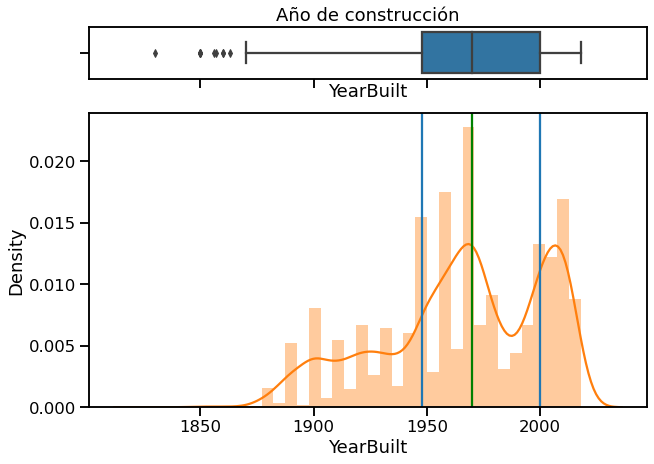

In [21]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df_2.YearBuilt, ax=ax_box)
sns.distplot(df_2.YearBuilt, ax=ax_hist, kde=False, hist=False)
sns.distplot(df_2.YearBuilt, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(df_2.YearBuilt.quantile(0.25))
plt.axvline(df_2.YearBuilt.quantile(0.50),color='g')
plt.axvline(df_2.YearBuilt.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Año de construcción")
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


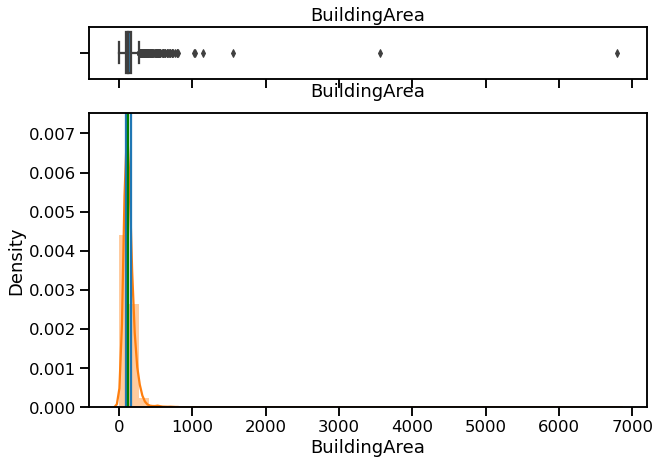

In [22]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df_2.BuildingArea, ax=ax_box)
sns.distplot(df_2.BuildingArea, ax=ax_hist, kde=False, hist=False)
sns.distplot(df_2.BuildingArea, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(df_2.BuildingArea.quantile(0.25))
plt.axvline(df_2.BuildingArea.quantile(0.50),color='g')
plt.axvline(df_2.BuildingArea.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("BuildingArea")
plt.show()

In [23]:
df_2.isnull().sum()

Price                   0
Distance                0
Landsize                0
Propertycount           0
airbnb_price_mean       0
                     ... 
date_month_7            0
date_month_8            0
date_month_9            0
BuildingArea         5852
YearBuilt            4862
Length: 906, dtype: int64

Es necesario escalar los datos si vamos a utilizar un método de imputación basado en distancias para que los valores converjan mas rápido. Se utilizará MinMaxScaler para que todas las variables queden a la misma escala, considerando que las dummies admiten valores 0 y 1

In [24]:
from sklearn.preprocessing import MinMaxScaler

variables_bef=df_2[['YearBuilt','BuildingArea']]

scaler=MinMaxScaler()

df_2[['YearBuilt','BuildingArea']]=scaler.fit_transform(df_2[['YearBuilt','BuildingArea']])

variables_bef_scaled=df_2[['YearBuilt','BuildingArea']]

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:xlabel='BuildingArea', ylabel='Density'>

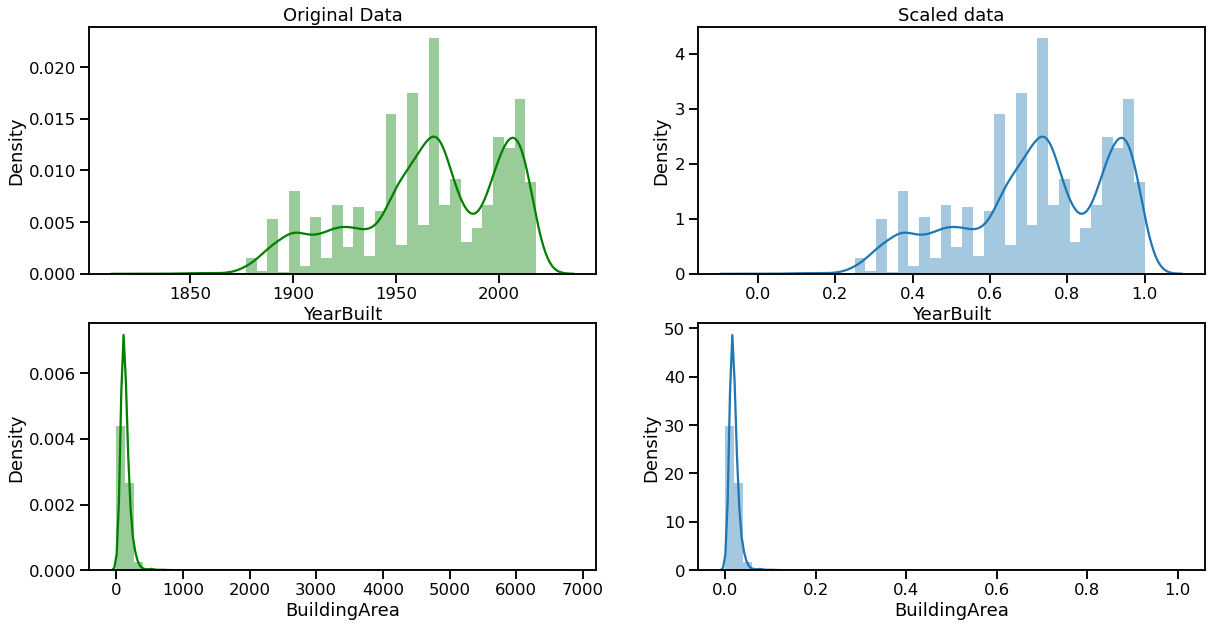

In [25]:
fig, ax=plt.subplots(2,2,figsize=(20,10)) ##Haría este gráfico para que sea más comparable
sns.distplot(variables_bef.YearBuilt, ax=ax[0,0],color='Green')
ax[0,0].set_title("Original Data")

sns.distplot(df_2.YearBuilt, ax=ax[0,1])
ax[0,1].set_title("Scaled data")

sns.distplot(variables_bef.BuildingArea, ax=ax[1,0],color='Green')

sns.distplot(df_2.BuildingArea, ax=ax[1,1])


In [26]:
df_2[['YearBuilt','BuildingArea']].isnull().sum()

YearBuilt       4862
BuildingArea    5852
dtype: int64

In [27]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

df_2[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(df_2[['YearBuilt', 'BuildingArea']])

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [28]:
df_2[['YearBuilt','BuildingArea']].isnull().sum()

YearBuilt       0
BuildingArea    0
dtype: int64

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


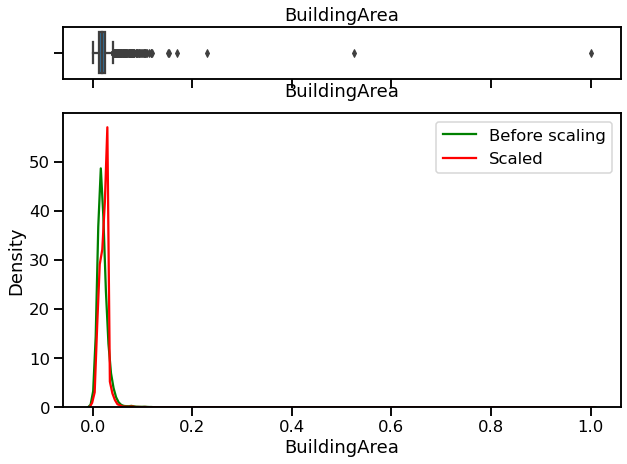

In [29]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)}) ##Me parece que este gráfico está muy cargado, sacaría los cuatiles y los histogramas, dejaría la línea de las dos distribuciones
 
#Se añade un gráfico a cada parte

sns.boxplot(variables_bef_scaled.BuildingArea, ax=ax_box)

sns.kdeplot(variables_bef_scaled.BuildingArea,color='g',ax=ax_hist,label='Before scaling')
sns.kdeplot(df_2.BuildingArea,color='r',ax=ax_hist,label='Scaled')

plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("BuildingArea")
plt.legend()
plt.show()

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

Primero es necesario escalar los datos. En este caso únicamente se escalarán las variables numéricas, con el mismo método.

In [30]:
cols_vars_to_scale=df_num.columns

In [31]:
scaler=MinMaxScaler()

df_2[cols_vars_to_scale]=scaler.fit_transform(df_2[cols_vars_to_scale])

In [32]:
df_2

,Price,Distance,Landsize,Propertycount,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count,Rooms_1,Rooms_10,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Postcode_3000.0,Postcode_3002.0,Postcode_3003.0,Postcode_3006.0,Postcode_3008.0,Postcode_3011.0,Postcode_3012.0,Postcode_3013.0,Postcode_3015.0,Postcode_3016.0,Postcode_3018.0,Postcode_3019.0,Postcode_3020.0,Postcode_3021.0,Postcode_3023.0,Postcode_3024.0,Postcode_3025.0,Postcode_3027.0,Postcode_3028.0,Postcode_3029.0,Postcode_3030.0,Postcode_3031.0,Postcode_3032.0,Postcode_3033.0,Postcode_3037.0,Postcode_3039.0,Postcode_3040.0,Postcode_3042.0,Postcode_3043.0,Postcode_3044.0,Postcode_3046.0,Postcode_3047.0,Postcode_3049.0,Postcode_3051.0,Postcode_3052.0,Postcode_3053.0,Postcode_3054.0,Postcode_3055.0,Postcode_3056.0,Postcode_3057.0,Postcode_3058.0,Postcode_3059.0,Postcode_3064.0,Postcode_3065.0,Postcode_3066.0,Postcode_3067.0,Postcode_3068.0,Postcode_3070.0,Postcode_3071.0,Postcode_3072.0,Postcode_3073.0,Postcode_3074.0,Postcode_3076.0,Postcode_3078.0,Postcode_3079.0,Postcode_3081.0,Postcode_3082.0,Postcode_3083.0,Postcode_3084.0,Postcode_3088.0,Postcode_3095.0,Postcode_3101.0,Postcode_3102.0,Postcode_3103.0,Postcode_3104.0,Postcode_3105.0,Postcode_3106.0,Postcode_3107.0,Postcode_3108.0,Postcode_3109.0,Postcode_3113.0,Postcode_3116.0,Postcode_3121.0,Postcode_3122.0,Postcode_3123.0,Postcode_3124.0,Postcode_3125.0,Postcode_3126.0,Postcode_3127.0,Postcode_3128.0,Postcode_3130.0,Postcode_3131.0,Postcode_3132.0,Postcode_3133.0,Postcode_3134.0,Postcode_3135.0,Postcode_3136.0,Postcode_3138.0,Postcode_3141.0,Postcode_3142.0,Postcode_3143.0,Postcode_3144.0,Postcode_3145.0,Postcode_3146.0,Postcode_3147.0,Postcode_3148.0,Postcode_3149.0,Postcode_3150.0,Postcode_3151.0,Postcode_3152.0,Postcode_3153.0,Postcode_3155.0,Postcode_3156.0,Postcode_3158.0,Postcode_3161.0,Postcode_3162.0,Postcode_3163.0,Postcode_3165.0,Postcode_3166.0,Postcode_3167.0,Postcode_3168.0,Postcode_3169.0,Postcode_3170.0,Postcode_3171.0,Postcode_3172.0,Postcode_3173.0,Postcode_3174.0,Postcode_3175.0,Postcode_3178.0,Postcode_3179.0,Postcode_3181.0,Postcode_3182.0,Postcode_3183.0,Postcode_3184.0,Postcode_3185.0,Postcode_3186.0,Postcode_3187.0,Postcode_3188.0,Postcode_3189.0,Postcode_3190.0,Postcode_3191.0,Postcode_3192.0,Postcode_3193.0,Postcode_3194.0,Postcode_3195.0,Postcode_3196.0,Postcode_3197.0,Postcode_3198.0,Postcode_3199.0,Postcode_3204.0,Postcode_3205.0,Postcode_3206.0,Postcode_3207.0,Postcode_3337.0,Postcode_3338.0,Postcode_3429.0,Postcode_3752.0,Postcode_3754.0,Postcode_3775.0,Postcode_3777.0,Postcode_3782.0,Postcode_3802.0,Postcode_3805.0,Postcode_3806.0,Postcode_3809.0,Postcode_3810.0,Postcode_3977.0,Bathroom_0.0,Bathroom_1.0,Bathroom_2.0,Bathroom_3.0,Bathroom_4.0,Bathroom_5.0,Bathroom_6.0,Bathroom_8.0,Car_0.0,Car_1.0,Car_10.0,Car_2.0,Car_3.0,Car_4.0,Car_5.0,Car_6.0,Car_7.0,Car_8.0,Car_9.0,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,SellerG_@Realty,SellerG_ASL,SellerG_Abercromby's,SellerG_Alexkarbon,SellerG_Allens,SellerG_Anderson,SellerG_Appleby,SellerG_Aquire,SellerG_Area,SellerG_Ascend,SellerG_Ash,SellerG_Asset,SellerG_Assisi,SellerG_Australian,SellerG_Barlow,SellerG_Barry,SellerG_Bayside,SellerG_Bekdon,SellerG_Beller,SellerG_Bells,SellerG_Besser,SellerG_Better,SellerG_Biggin,SellerG_Blue,SellerG_Boutique,SellerG_Bowman,SellerG_Brace,SellerG_Brad,SellerG_Buckingham,SellerG_Bullen,SellerG_Burnham,SellerG_Buxton,SellerG_Buxton/Advantage,SellerG_Buxton/Find,SellerG_C21,SellerG_CASTRAN,SellerG_Caine,SellerG_Calder,SellerG_Carter,...,Suburb_Oakleigh East,Suburb_Oakleigh South,Suburb_Officer,Suburb_Ormond,Suburb_Pakenham,Suburb_Parkdale,Sub

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


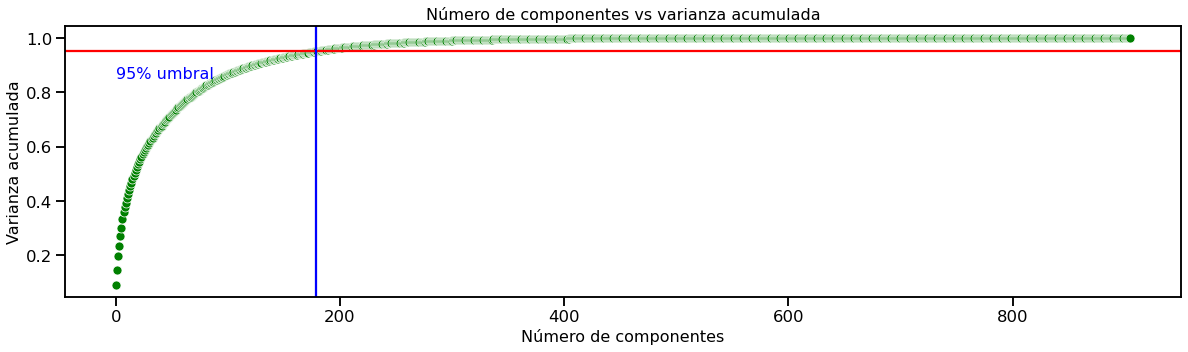

In [33]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_2)

x = np.arange(0, 906, step=1)
y = np.cumsum(pca.explained_variance_ratio_) #acomulado

plt.figure(figsize=(20,5))
sns.scatterplot(x, y, linestyle='-', color='g')

plt.xlabel('Número de componentes',fontsize=16)
plt.ylabel('Varianza acumulada',fontsize=16)
plt.title('Número de componentes vs varianza acumulada',fontsize=16)

plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=179, color='b', linestyle='-')
plt.text(0.5, 0.85, '95% umbral', color = 'b', fontsize=16)

plt.show()

In [34]:
lista=list(enumerate(pca.explained_variance_ratio_.cumsum(),1))

[(i,j) for (i,j) in lista if (j >= 0.95) & ((j < 0.96))]

[(179, 0.9500608041919856),
 (180, 0.9507264063958275),
 (181, 0.9513877530769876),
 (182, 0.9520419648456632),
 (183, 0.9526925613604055),
 (184, 0.9533268908472616),
 (185, 0.9539586202171216),
 (186, 0.9545808493368442),
 (187, 0.9551988056891187),
 (188, 0.9558106139478614),
 (189, 0.9564103493661171),
 (190, 0.9570066201156089),
 (191, 0.957601067366626),
 (192, 0.9581853764750609),
 (193, 0.9587658677693391),
 (194, 0.9593265281552912),
 (195, 0.95988535534161)]

n = min(20, X.shape[0])n = min(20, X.shape[0])Como se puede observar, con n=179 se determina el número de componentes optimos que retiene al menos el 95 % de la varianza.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [35]:
# Primeras 179 componentes principales

pca2 = PCA(n_components=179)
pca_dummy_features = pca2.fit_transform(df_2)
pca_dummy_features_df=pd.DataFrame(pca_dummy_features)### cómo se puede poner el nombre de cada componente sin escribir las 86?? (lau)
pca_dummy_features_df[:6]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
0,1.009267,0.271608,-0.885052,0.373388,-0.616584,-0.089996,0.369139,0.358900,-0.130314,0.066824,-0.407085,-0.071500,-0.074660,-0.263869,-0.104390,0.031150,-0.002810,0.078942,0.236494,-0.240205,0.145545,-0.045774,0.119521,0.249666,-0.297567,-0.238139,-0.077415,-0.049826,-0.021471,0.343108,-0.006978,-0.264956,0.191503,-0.057743,0.138989,0.177595,0.074878,-0.073758,0.070190,-0.107690,-0.040194,0.274978,-0.039290,0.137238,-0.323574,-0.050941,0.518804,-0.343518,0.084527,0.122653,0.096510,0.209820,0.056954,0.002137,0.032087,0.010185,0.073414,0.153092,-0.055239,0.056982,-0.018135,0.012923,0.100291,-0.118835,-0.237387,-0.043725,-0.299687,-0.140010,-0.117835,-0.181772,-0.026250,-0.095877,0.048671,0.229413,0.179910,0.027584,-0.111581,-0.084294,-0.196994,-0.685631,-0.370616,-0.394008,-0.051576,-0.097593,0.127048,-0.229257,-0.171364,-0.026396,-0.207941,-0.046496,-0.157823,0.090650,-0.247988,0.093367,-0.123206,-0.210597,0.115314,0.101552,0.164356,0.019938,-0.234198,-0.271845,-0.001422,-0.038817,0.090008,-0.238962,-0.137725,-0.158907,0.259080,-0.706443,0.333083,-0.598095,-0.265678,0.548878,-0.247412,-0.085250,0.009689,0.039990,0.513015,-0.317363,-0.377549,-0.032903,0.095603,-0.191544,0.095855,-0.130790,-0.013771,0.122670,-0.033757,0.028569,-0.071538,0.080591,0.015749,-0.108252,-0.045493,0.038483,-0.034490,-0.026906,0.042605,0.041245,0.014170,0.000498,-0.047068,-0.001783,0.001372,0.018478,-0.013042,-0.031601,0.002067,0.025993,-0.013776,0.031897,0.039391,-0.018792,0.001799,-0.022701,-0.019388,-0.026600,-0.016507,-0.014554,-0.009107,0.009791,-0.019971,0.008117,-0.018511,0.023198,0.020316,-0.018005,-0.008352,0.012131,-0.055497,0.014352,-0.008631,0.010895,0.005220,-0.008234,0.003090,0.009526,0.023527
1,0.661752,0.215516,-0.929030,0.241518,-0.865611,-0.523246,0.130436,0.149743,-0.580765,0.005702,-0.671707,-0.181510,-0.158676,0.457194,-0.056051,0.226122,-0.070488,0.322846,-0.258121,-0.225856,0.059113,0.086715,-0.115234,0.063190,-0.304681,-0.141659,-0.088119,-0.107768,-0.100956,0.096124,-0.121240,-0.302002,0.026575,-0.212180,0.017164,0.042866,-0.070209,-0.085559,0.000798,0.051774,-0.199938,0.060248,0.002108,0.204370,-0.096596,0.118149,-0.125569,-0.172226,0.043278,0.078066,0.271448,0.154952,-0.233239,0.021257,0.095250,-0.075450,-0.147993,0.160197,0.058390,0.118433,-0.130488,-0.233383,0.140024,0.379552,0.016128,0.051949,0.305471,-0.277241,-0.122122,-0.170822,0.334325,0.080600,0.246208,0.479218,0.518990,0.199644,-0.131948,-0.035565,-0.135913,-0.709457,-0.298300,-0.314037,0.047733,-0.087988,0.188078,-0.219415,-0.183541,-0.050455,-0.115635,-0.018683,-0.154242,0.078420,-0.095726,0.104111,0.215716,-0.137727,0.081278,-0.031322,0.129876,0.023528,-0.208699,-0.282145,-0.043489,0.016319,0.112415,-0.262586,-0.233076,-0.130178,0.300071,-0.655123,0.421640,-0.563994,-0.248055,0.542418,-0.262318,-0.112305,-0.011079,-0.022332,0.518598,-0.277261,-0.349185,-0.050555,0.097259,-0.162235,0.081312,-0.171956,-0.022319,0.110929,0.005040,0.004895,-0.041483,0.062158,0.011274,-0.088950,-0.027372,0.017164,-0.025846,-0.033812,0.000122,0.028805,0.015719,0.015093,-0.047016,0.007493,-0.005683,-0.005424,-0.016603,-0.006627,0.010775,0.036376,0.000507,0.032197,0.025788,-0.022927,0.016949,-0.014073,-0.037208,-0.023190,-0.014700,0.014682,-0.021648,0.012819,-0.012426,-0.010663,0.002639,0.018655,0.017198,-0.004890,0.000759,0.015785,-0.026721,0.004771,-0.013062,0.000093,-0.017429,-0.012821,-0.0

In [36]:
#Se guarda el archivo con las componentes principales en un csv

pca_dummy_features_df.to_csv("melbourne_houses_pca.csv", index=False)

In [37]:
#Se une el dataframe de las variables con el de las componentes principales (se supone que nos deberíamos quedar con los componentes principales pero por las dudas los uní a dataframe)
df_2_pca = pd.concat([df_2, pca_dummy_features_df], axis=1)
df_2_pca[:6]

,Price,Distance,Landsize,Propertycount,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count,Rooms_1,Rooms_10,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Postcode_3000.0,Postcode_3002.0,Postcode_3003.0,Postcode_3006.0,Postcode_3008.0,Postcode_3011.0,Postcode_3012.0,Postcode_3013.0,Postcode_3015.0,Postcode_3016.0,Postcode_3018.0,Postcode_3019.0,Postcode_3020.0,Postcode_3021.0,Postcode_3023.0,Postcode_3024.0,Postcode_3025.0,Postcode_3027.0,Postcode_3028.0,Postcode_3029.0,Postcode_3030.0,Postcode_3031.0,Postcode_3032.0,Postcode_3033.0,Postcode_3037.0,Postcode_3039.0,Postcode_3040.0,Postcode_3042.0,Postcode_3043.0,Postcode_3044.0,Postcode_3046.0,Postcode_3047.0,Postcode_3049.0,Postcode_3051.0,Postcode_3052.0,Postcode_3053.0,Postcode_3054.0,Postcode_3055.0,Postcode_3056.0,Postcode_3057.0,Postcode_3058.0,Postcode_3059.0,Postcode_3064.0,Postcode_3065.0,Postcode_3066.0,Postcode_3067.0,Postcode_3068.0,Postcode_3070.0,Postcode_3071.0,Postcode_3072.0,Postcode_3073.0,Postcode_3074.0,Postcode_3076.0,Postcode_3078.0,Postcode_3079.0,Postcode_3081.0,Postcode_3082.0,Postcode_3083.0,Postcode_3084.0,Postcode_3088.0,Postcode_3095.0,Postcode_3101.0,Postcode_3102.0,Postcode_3103.0,Postcode_3104.0,Postcode_3105.0,Postcode_3106.0,Postcode_3107.0,Postcode_3108.0,Postcode_3109.0,Postcode_3113.0,Postcode_3116.0,Postcode_3121.0,Postcode_3122.0,Postcode_3123.0,Postcode_3124.0,Postcode_3125.0,Postcode_3126.0,Postcode_3127.0,Postcode_3128.0,Postcode_3130.0,Postcode_3131.0,Postcode_3132.0,Postcode_3133.0,Postcode_3134.0,Postcode_3135.0,Postcode_3136.0,Postcode_3138.0,Postcode_3141.0,Postcode_3142.0,Postcode_3143.0,Postcode_3144.0,Postcode_3145.0,Postcode_3146.0,Postcode_3147.0,Postcode_3148.0,Postcode_3149.0,Postcode_3150.0,Postcode_3151.0,Postcode_3152.0,Postcode_3153.0,Postcode_3155.0,Postcode_3156.0,Postcode_3158.0,Postcode_3161.0,Postcode_3162.0,Postcode_3163.0,Postcode_3165.0,Postcode_3166.0,Postcode_3167.0,Postcode_3168.0,Postcode_3169.0,Postcode_3170.0,Postcode_3171.0,Postcode_3172.0,Postcode_3173.0,Postcode_3174.0,Postcode_3175.0,Postcode_3178.0,Postcode_3179.0,Postcode_3181.0,Postcode_3182.0,Postcode_3183.0,Postcode_3184.0,Postcode_3185.0,Postcode_3186.0,Postcode_3187.0,Postcode_3188.0,Postcode_3189.0,Postcode_3190.0,Postcode_3191.0,Postcode_3192.0,Postcode_3193.0,Postcode_3194.0,Postcode_3195.0,Postcode_3196.0,Postcode_3197.0,Postcode_3198.0,Postcode_3199.0,Postcode_3204.0,Postcode_3205.0,Postcode_3206.0,Postcode_3207.0,Postcode_3337.0,Postcode_3338.0,Postcode_3429.0,Postcode_3752.0,Postcode_3754.0,Postcode_3775.0,Postcode_3777.0,Postcode_3782.0,Postcode_3802.0,Postcode_3805.0,Postcode_3806.0,Postcode_3809.0,Postcode_3810.0,Postcode_3977.0,Bathroom_0.0,Bathroom_1.0,Bathroom_2.0,Bathroom_3.0,Bathroom_4.0,Bathroom_5.0,Bathroom_6.0,Bathroom_8.0,Car_0.0,Car_1.0,Car_10.0,Car_2.0,Car_3.0,Car_4.0,Car_5.0,Car_6.0,Car_7.0,Car_8.0,Car_9.0,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,SellerG_@Realty,SellerG_ASL,SellerG_Abercromby's,SellerG_Alexkarbon,SellerG_Allens,SellerG_Anderson,SellerG_Appleby,SellerG_Aquire,SellerG_Area,SellerG_Ascend,SellerG_Ash,SellerG_Asset,SellerG_Assisi,SellerG_Australian,SellerG_Barlow,SellerG_Barry,SellerG_Bayside,SellerG_Bekdon,SellerG_Beller,SellerG_Bells,SellerG_Besser,SellerG_Better,SellerG_Biggin,SellerG_Blue,SellerG_Boutique,SellerG_Bowman,SellerG_Brace,SellerG_Brad,SellerG_Buckingham,SellerG_Bullen,SellerG_Burnham,SellerG_Buxton,SellerG_Buxton/Advantage,SellerG_Buxton/Find,SellerG_C21,SellerG_CASTRAN,SellerG_Caine,SellerG_Calder,SellerG_Carter,...,zipcode_3156.0,zipcode_3158.0,zipcode_3161.0,zipcode_3162.0,zipcode_3163.0,zipcode_3165.0,zipcode_3166.0,zi

In [38]:
#Se guarda el archivo concatenado en un csv

df_2_pca.to_csv("melbourne_houses_concat.csv", index=False)